In [1]:
from tensorflow import keras
import tensorflow as tf
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cifar10 = keras.datasets.cifar10
(x_train,y_train),(x_test , y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
print(x_train.shape , x_test.shape)
print(y_train.shape , y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


In [4]:
x_train/255.0 , x_test/255.0
y_train = to_categorical(y_train,num_classes = 10)
y_test = to_categorical(y_test , num_classes = 10)

In [5]:
print(x_train.shape , x_test.shape)
print(y_train.shape , y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 10) (10000, 10)


In [6]:
label_name = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}


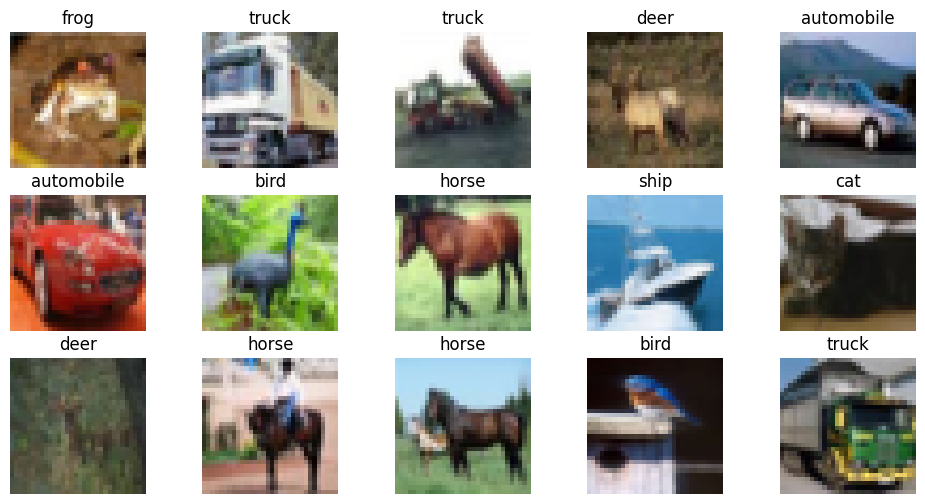

In [7]:
plt.figure(figsize=(12,6))
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.imshow(x_train[i])
  plt.title(label_name[np.argmax(y_train[i] , axis = 0)])
  plt.axis("off")
plt.show()

In [49]:
model = keras.models.Sequential([
    keras.layers.Conv2D(input_shape = (32,32,3) , filters = 64 , activation="relu" , kernel_size=(3,3) , padding="same"),
    keras.layers.Conv2D(kernel_size = (3,3) , filters = 64 , activation="relu" , padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D((2,2)),

    keras.layers.Conv2D(filters = 64 , kernel_size = (3,3) ,padding="same" ,activation="relu"),
    keras.layers.Conv2D(filters = 64 , kernel_size = (3,3) , padding = "same" , activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D((2,2)),

    keras.layers.Conv2D(filters = 128, kernel_size = (3,3) ,padding="same" ,activation="relu"),
    keras.layers.Conv2D(filters = 128 , kernel_size = (3,3) , padding = "same" , activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D((2,2)),

    keras.layers.Flatten(),

    keras.layers.Dense(1028 , activation="relu", kernel_regularizer=keras.regularizers.l2(0.2)),
    keras.layers.Dropout(0.25),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10 , activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
print(model.summary())

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)                   │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1028)                │       2,106,372 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 1028)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 1028)                │           4,112 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │          10,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,455,814 (9.37 MB)

 Trainable params: 2,453,246 (9.36 MB)

 Non-trainable params: 2,568 (10.03 KB)

None


In [51]:
model.compile(loss = keras.losses.CategoricalCrossentropy() , optimizer=keras.optimizers.Adam(learning_rate = 0.001) , metrics=["accuracy"])

In [52]:
history = model.fit(x_train , y_train , validation_data = (x_test , y_test) , batch_size=32 , verbose = 2 , epochs =20 )

Epoch 1/20
1563/1563 - 23s - 15ms/step - accuracy: 0.4555 - loss: 6.2155 - val_accuracy: 0.5368 - val_loss: 2.8722
Epoch 2/20
1563/1563 - 13s - 8ms/step - accuracy: 0.6260 - loss: 2.1638 - val_accuracy: 0.5805 - val_loss: 2.0220
Epoch 3/20
1563/1563 - 21s - 13ms/step - accuracy: 0.6865 - loss: 1.6754 - val_accuracy: 0.6647 - val_loss: 1.6317
Epoch 4/20
1563/1563 - 12s - 8ms/step - accuracy: 0.7256 - loss: 1.3875 - val_accuracy: 0.7254 - val_loss: 1.4023
Epoch 5/20
1563/1563 - 20s - 13ms/step - accuracy: 0.7517 - loss: 1.2601 - val_accuracy: 0.6948 - val_loss: 1.3410
Epoch 6/20
1563/1563 - 20s - 13ms/step - accuracy: 0.7795 - loss: 1.1405 - val_accuracy: 0.7413 - val_loss: 1.3212
Epoch 7/20
1563/1563 - 20s - 13ms/step - accuracy: 0.7967 - loss: 1.0891 - val_accuracy: 0.7426 - val_loss: 1.2335
Epoch 8/20
1563/1563 - 12s - 8ms/step - accuracy: 0.8122 - loss: 1.0141 - val_accuracy: 0.7819 - val_loss: 1.0651
Epoch 9/20
1563/1563 - 20s - 13ms/step - accuracy: 0.8236 - loss: 0.9729 - val_accu

Text(0.5, 1.0, 'Loss')

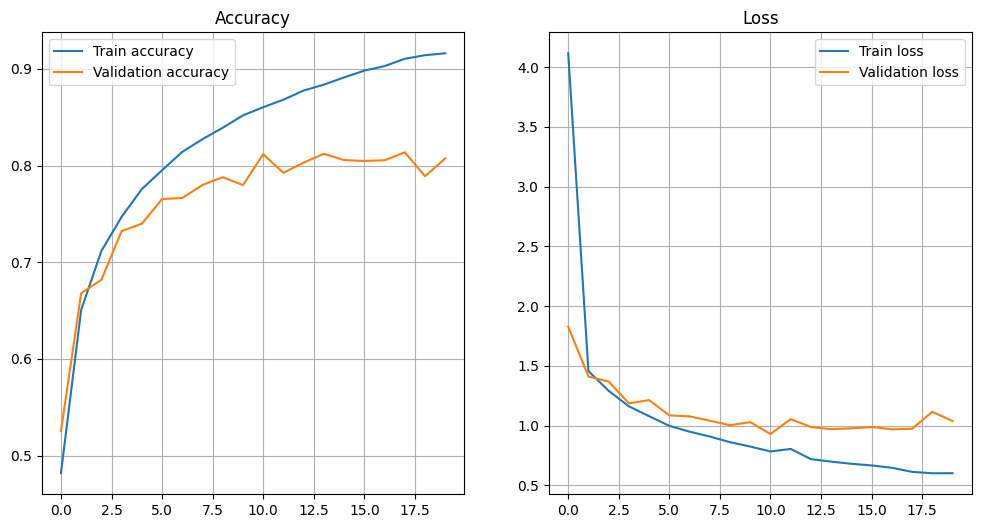

In [44]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"] , label="Train accuracy")
plt.plot(history.history["val_accuracy"],label = "Validation accuracy")
plt.legend()
plt.grid()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history["loss"] , label="Train loss")
plt.plot(history.history["val_loss"],label = "Validation loss")
plt.legend()
plt.grid()
plt.title("Loss")




In [45]:
prediction = model.predict(x_test[:15])
prediction = np.argmax(prediction,axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 740ms/step


In [46]:
print(prediction)
print(np.argmax(y_test[:15] ,axis=1))

[3 1 8 0 6 6 1 3 3 0 0 9 5 7 9]
[3 8 8 0 6 6 1 6 3 1 0 9 5 7 9]


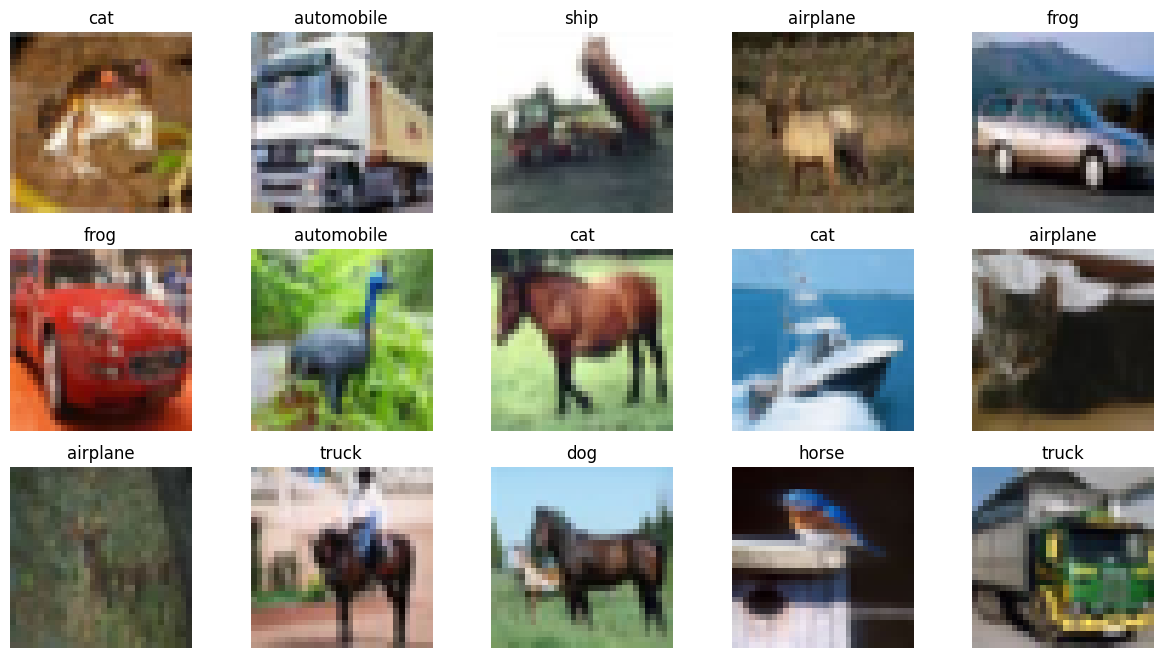

In [47]:
plt.figure(figsize=(15,8))
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.imshow(x_train[i])
  plt.title(label_name[prediction[i]])
  plt.axis("off")
plt.show()

In [48]:
model.evaluate(x_test , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8097 - loss: 1.0431


[1.0391291379928589, 0.8073999881744385]

In [76]:
model2 = keras.models.Sequential([
    keras.layers.Conv2D(input_shape = (32,32,3) , filters = 64 , activation="relu" , kernel_size=(3,3) , padding="same"),
    keras.layers.Conv2D(kernel_size = (3,3) , filters = 64 , activation="relu" , padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D((2,2)),

    keras.layers.Conv2D(filters = 128 , kernel_size = (3,3) ,padding="same" ,activation="relu"),
    keras.layers.Conv2D(filters = 128 , kernel_size = (3,3) , padding = "same" , activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D((2,2)),

    keras.layers.Conv2D(filters = 256, kernel_size = (3,3) ,padding="same" ,activation="relu"),
    keras.layers.Conv2D(filters = 256 , kernel_size = (3,3) , padding = "same" , activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D((2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(1028 , activation="relu", kernel_regularizer=keras.regularizers.l2(0.1)),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128 , activation = "relu" , kernel_regularizer = keras.regularizers.l2(0.5)),
    keras.layers.Dense(10 , activation="softmax")
])

In [77]:
print(model2.summary())

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_74 (Conv2D)                   │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_75 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_42               │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_37 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_76 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_77 (Conv2D)                   │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_43               │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_38 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_78 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_79 (Conv2D)                   │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_44               │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_39 (MaxPooling2D)      │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 1028)                │       4,211,716 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 1028)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_45               │ (None, 1028)                │           4,112 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 128)                 │         131,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,496,030 (20.97 MB)

 Trainable params: 5,493,078 (20.95 MB)

 Non-trainable params: 2,952 (11.53 KB)

None


In [78]:
model2.compile(loss = keras.losses.CategoricalCrossentropy() , optimizer=keras.optimizers.Adam(learning_rate = 0.001) , metrics=["accuracy"])

In [79]:
history2 = model2.fit(x_train , y_train , validation_data = (x_test , y_test) , batch_size=32 , verbose = 2 , epochs = 20)

Epoch 1/20
1563/1563 - 31s - 20ms/step - accuracy: 0.4585 - loss: 6.2810 - val_accuracy: 0.4969 - val_loss: 3.2010
Epoch 2/20
1563/1563 - 17s - 11ms/step - accuracy: 0.6097 - loss: 2.7282 - val_accuracy: 0.6175 - val_loss: 2.5767
Epoch 3/20
1563/1563 - 21s - 13ms/step - accuracy: 0.6774 - loss: 2.2746 - val_accuracy: 0.6868 - val_loss: 2.0950
Epoch 4/20
1563/1563 - 20s - 13ms/step - accuracy: 0.7210 - loss: 2.0186 - val_accuracy: 0.7199 - val_loss: 1.9731
Epoch 5/20
1563/1563 - 20s - 13ms/step - accuracy: 0.7529 - loss: 1.8476 - val_accuracy: 0.7629 - val_loss: 1.7558
Epoch 6/20
1563/1563 - 20s - 13ms/step - accuracy: 0.7781 - loss: 1.7343 - val_accuracy: 0.7431 - val_loss: 1.8181
Epoch 7/20
1563/1563 - 22s - 14ms/step - accuracy: 0.7988 - loss: 1.6719 - val_accuracy: 0.7531 - val_loss: 1.8115
Epoch 8/20
1563/1563 - 19s - 12ms/step - accuracy: 0.8170 - loss: 1.6021 - val_accuracy: 0.7883 - val_loss: 1.5637
Epoch 9/20
1563/1563 - 20s - 13ms/step - accuracy: 0.8359 - loss: 1.5068 - val_a

Text(0.5, 1.0, 'Loss')

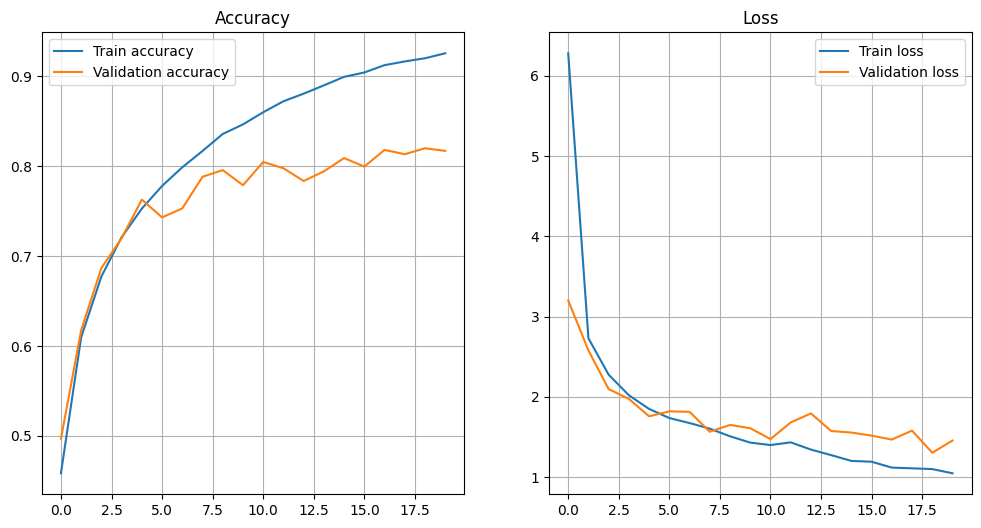

In [80]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.plot(history2.history["accuracy"] , label="Train accuracy")
plt.plot(history2.history["val_accuracy"],label = "Validation accuracy")
plt.legend()
plt.grid()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history2.history["loss"] , label="Train loss")
plt.plot(history2.history["val_loss"],label = "Validation loss")
plt.legend()
plt.grid()
plt.title("Loss")


In [81]:
prediction = model2.predict(x_test[:15])
prediction = np.argmax(prediction,axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 724ms/step


In [82]:
print(prediction)
print(np.argmax(y_test[:15] ,axis=1))

[3 8 8 0 6 6 1 3 3 1 3 9 5 7 9]
[3 8 8 0 6 6 1 6 3 1 0 9 5 7 9]


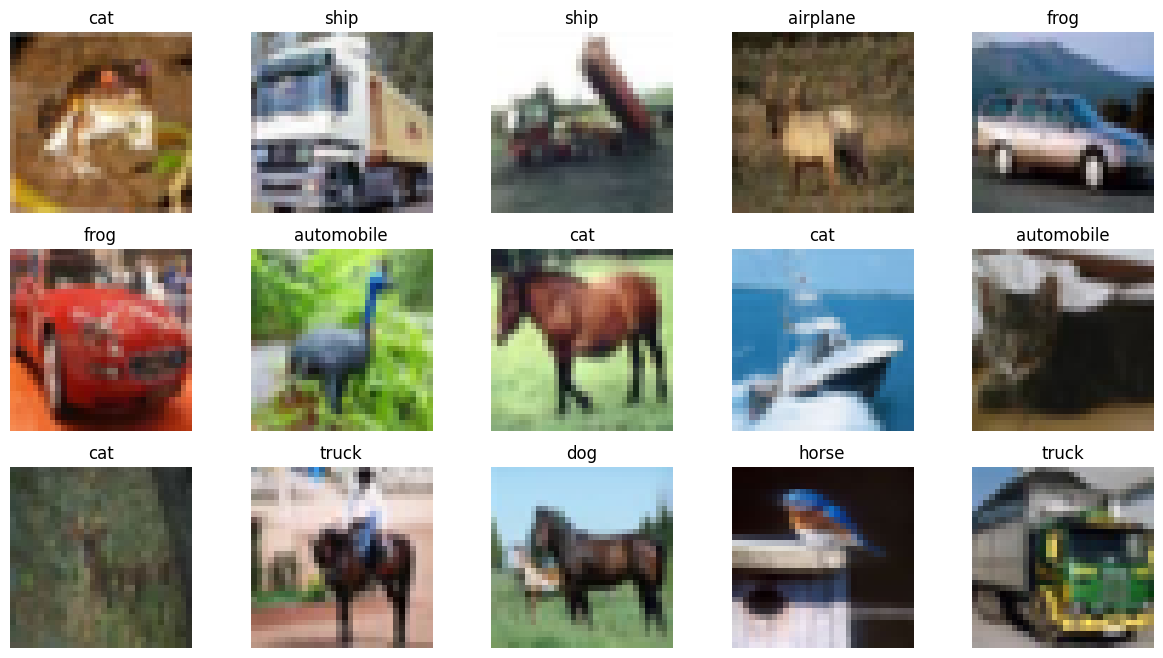

In [83]:
plt.figure(figsize=(15,8))
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.imshow(x_train[i])
  plt.title(label_name[prediction[i]])
  plt.axis("off")
plt.show()